In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

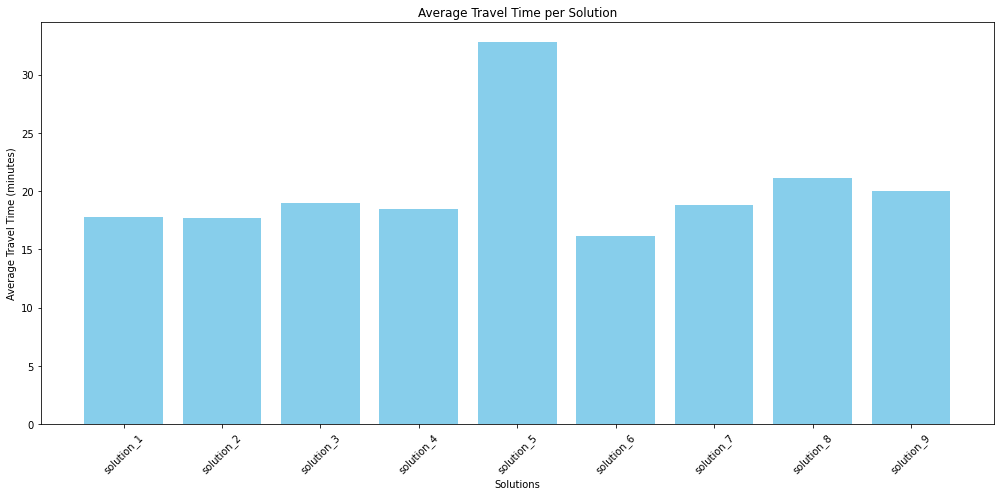

                        average_travel_time  max_travel_time
solution_1_travel_time            17.761733             98.5
solution_2_travel_time            17.690524            139.1
solution_3_travel_time            18.976266            121.3
solution_4_travel_time            18.456054            151.1
solution_5_travel_time            32.847006            150.0
solution_6_travel_time            16.159983            142.2
solution_7_travel_time            18.846598            136.3
solution_8_travel_time            21.121161            143.2
solution_9_travel_time            20.025172            140.3


In [10]:
# Load the data
file_path = './Data_Output/activities_output_2122_AT_20240201_112443.csv'  
data = pd.read_csv(file_path)

# Identify columns related to solutions' travel times
solution_columns = [col for col in data.columns if 'solution_' in col and 'travel_time' in col]

# Calculate the average and maximum travel times for each solution
travel_time_stats = {}
for col in solution_columns:
    travel_time_stats[col] = {
        'average_travel_time': data[col].mean(),
        'max_travel_time': data[col].max()
    }

travel_time_stats_df = pd.DataFrame(travel_time_stats).T

# Visualize the average travel times for comparison
avg_travel_times = [stats['average_travel_time'] for stats in travel_time_stats.values()]
solution_labels = [label.replace('_travel_time', '') for label in travel_time_stats.keys()]

plt.figure(figsize=(14, 7))
plt.bar(solution_labels, avg_travel_times, color='skyblue')
plt.xlabel('Solutions')
plt.ylabel('Average Travel Time (minutes)')
plt.title('Average Travel Time per Solution')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# To use the statistics for further analysis:
print(travel_time_stats_df)


In [11]:
travel_time_data = data[[col for col in data.columns if 'travel_time' in col]]


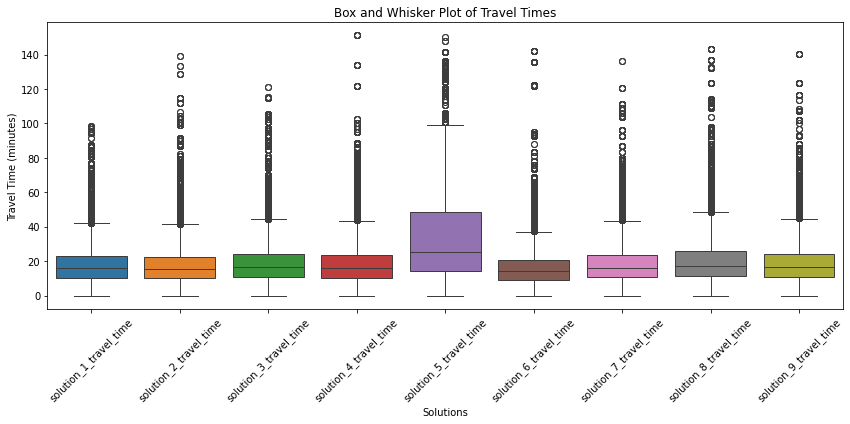

In [12]:
# Box and Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=travel_time_data)
plt.xticks(rotation=45)
plt.title('Box and Whisker Plot of Travel Times')
plt.xlabel('Solutions')
plt.ylabel('Travel Time (minutes)')
plt.tight_layout()
plt.show()

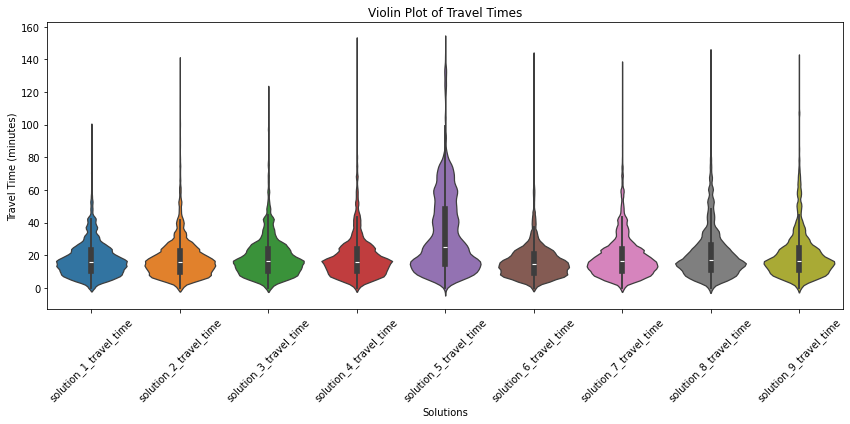

In [13]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=travel_time_data)
plt.xticks(rotation=45)
plt.title('Violin Plot of Travel Times')
plt.xlabel('Solutions')
plt.ylabel('Travel Time (minutes)')
plt.tight_layout()
plt.show()

In [14]:
# Calculate site size by counting the number of activities per SiteCode grouped by CC_Level
site_sizes = data.groupby(['CC_Level', 'SiteCode']).size().reset_index(name='SiteSize')

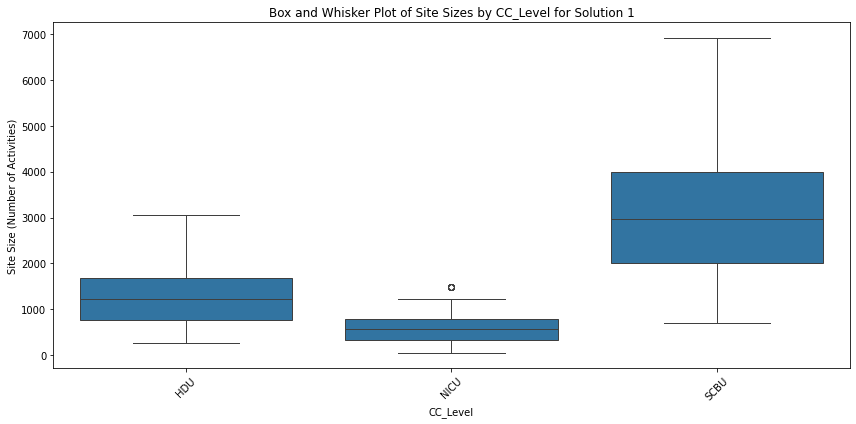

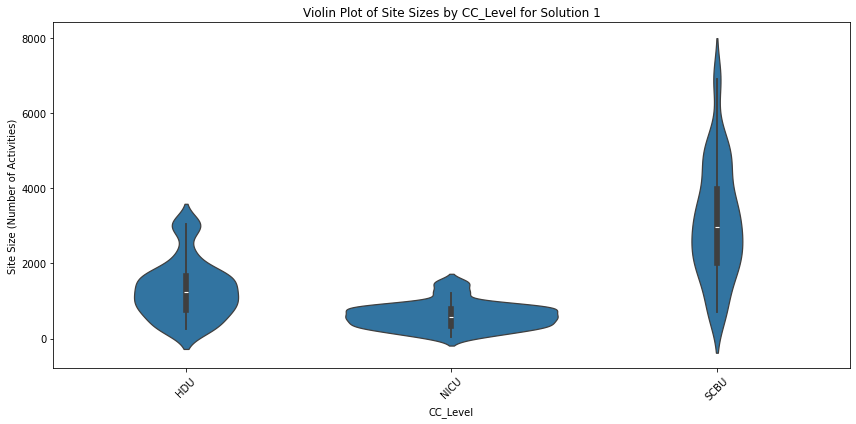

In [20]:
# Initialize a DataFrame to store site sizes for all solutions
site_sizes_all_solutions = pd.DataFrame()

site_sizes_dfs = []

# Loop through each solution
for i in range(1, 10):  # Adjust this range based on the number of solutions
    solution_col = f'solution_{i}'
    # Check if the solution column exists
    if solution_col in data.columns:
        # Count the number of activities per site code for this solution
        site_sizes = data.groupby([solution_col, 'CC_Level']).size().reset_index(name=f'SiteSize_Solution_{i}')
        # Append the DataFrame to the list
        site_sizes_dfs.append(site_sizes)

# Concatenate all DataFrames in the list
site_sizes_all_solutions = pd.concat(site_sizes_dfs)

# Now let's visualize the site sizes with a box and whisker plot for each CC_Level and solution
plt.figure(figsize=(12, 6))
sns.boxplot(x='CC_Level', y='SiteSize_Solution_1', data=site_sizes_all_solutions)
plt.xticks(rotation=45)
plt.title('Box and Whisker Plot of Site Sizes by CC_Level for Solution 1')
plt.xlabel('CC_Level')
plt.ylabel('Site Size (Number of Activities)')
plt.tight_layout()
plt.show()


# For a violin plot, just replace sns.boxplot with sns.violinplot in the above code
plt.figure(figsize=(12, 6))
sns.violinplot(x='CC_Level', y='SiteSize_Solution_1', data=site_sizes_all_solutions)
plt.xticks(rotation=45)
plt.title('Violin Plot of Site Sizes by CC_Level for Solution 1')
plt.xlabel('CC_Level')
plt.ylabel('Site Size (Number of Activities)')
plt.tight_layout()
plt.show()



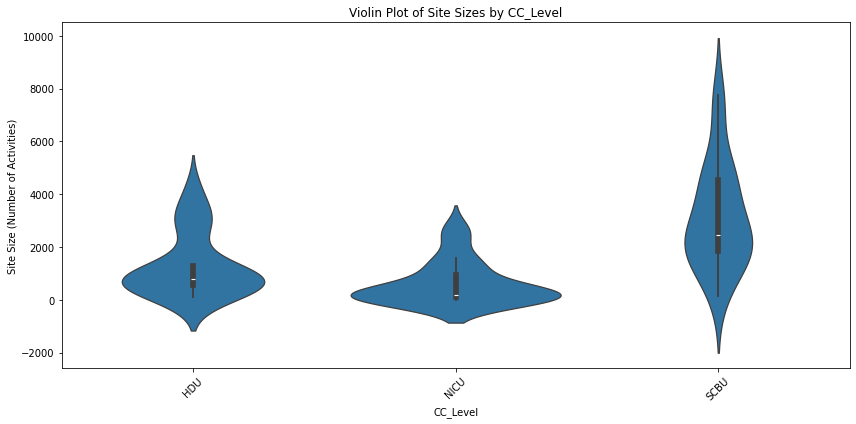

In [16]:
# We can also visualize with a violin plot for each CC_Level
plt.figure(figsize=(12, 6))
sns.violinplot(x='CC_Level', y='SiteSize', data=site_sizes)
plt.xticks(rotation=45)
plt.title('Violin Plot of Site Sizes by CC_Level')
plt.xlabel('CC_Level')
plt.ylabel('Site Size (Number of Activities)')
plt.tight_layout()
plt.show()